In [456]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

In [457]:
from sklearn.impute import KNNImputer

In [458]:
df = pd.read_csv(r"C:\Users\mituc\Ironhack\Curso\IronLabs\California-cleanin\california.csv", index_col = 0)

'id',: id de la casa<br>
'state',: el estado al que pertenece<br>
'gender',: el género de la persona que alquila la casa<br>
'median_home_val',: el valor de la casa<br>
'median_household_income',:_ la mediana de la renta de la poblacion<br>
'ic2', poblacion de la zona<br>
'ic3', numero de vecinos en el bloque<br>
'ic4', total de habitaciones<br>
'ic5', total de baños<br>
'avggift',:_ distancia a la playa<br>
'target_d': esta variable no la usaremos, asi que la podeis elimina<br>

In [459]:
df.head(5)

,id,state,gender,median_home_val,median_household_income,ic2,ic3,ic4,ic5,avggift,target_d
0,44060,FL,M,1158.437751,392.0,430.0,466.0,520.0,21975.0,NaN,100.0
1,96093,IL,M,537.000000,365.0,415.0,410.0,473.0,19387.0,5.666667,7.0
2,43333,FL,F,725.000000,301.0,340.0,361.0,436.0,18837.0,4.111111,5.0
3,21885,NC,M,1158.437751,401.0,407.0,399.0,413.0,14014.0,27.277778,38.0
4,190108,FL,F,995.000000,252.0,280.0,316.0,348.0,17991.0,6.000000,5.0


In [460]:
df.shape

(3993, 11)

In [461]:
df.duplicated(subset=["id"]).sum()

0

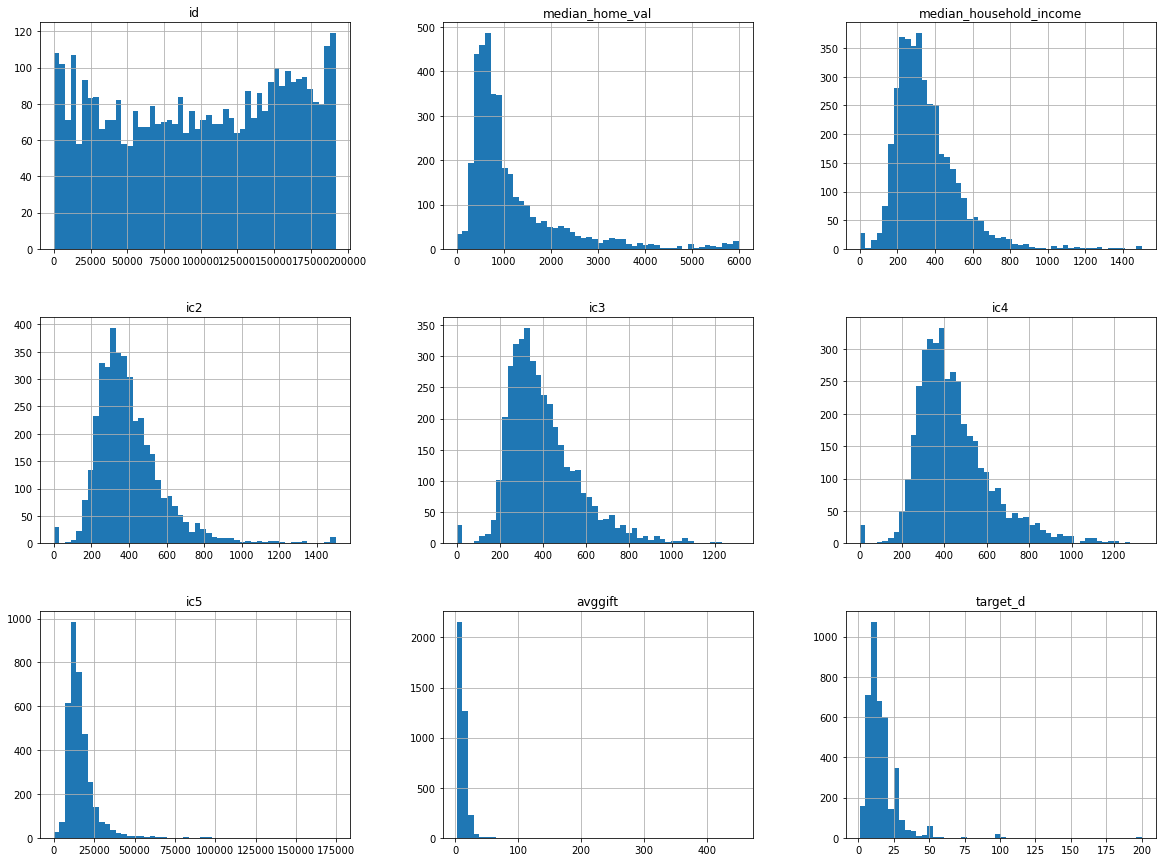

In [462]:
df.hist(bins = 50, figsize = (20,15))
plt.show()

In [463]:
corr_matrix = df.corr()
corr_matrix["median_home_val"].sort_values(ascending=False)


median_home_val            1.000000
ic5                        0.744776
ic4                        0.742227
ic2                        0.737371
ic3                        0.732857
median_household_income    0.700940
id                         0.253189
avggift                    0.125058
target_d                   0.110053
Name: median_home_val, dtype: float64

In [464]:
corr_matrix = df.corr()
corr_matrix["median_home_val"].sort_values(ascending=False)

median_home_val            1.000000
ic5                        0.744776
ic4                        0.742227
ic2                        0.737371
ic3                        0.732857
median_household_income    0.700940
id                         0.253189
avggift                    0.125058
target_d                   0.110053
Name: median_home_val, dtype: float64

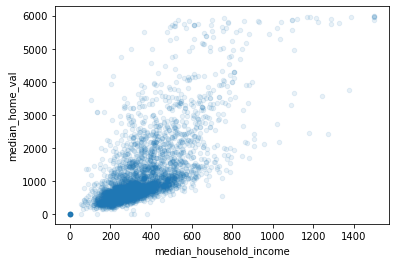

In [465]:
df.plot(kind="scatter", x="median_household_income", y="median_home_val",
 alpha=0.1)

plt.show()


In [466]:
df.isnull().sum()

id                           0
state                        9
gender                       0
median_home_val            200
median_household_income    120
ic2                          8
ic3                         80
ic4                         40
ic5                        399
avggift                    280
target_d                     0
dtype: int64

In [467]:
df["gender"].unique()

array(['M', 'F', 'female', 'Male', 'U', 'J', 'male', 'Female', 'feamale',
       'A'], dtype=object)

In [468]:
f = ['female','Female','feamale']
m = ['Male','male']

for i in f:
    df["gender"] = df["gender"].str.replace(i, 'F')
for i in m:
    df["gender"] = df["gender"].str.replace(i,'M')

In [469]:
df["gender"].unique()

array(['M', 'F', 'U', 'J', 'A'], dtype=object)

In [470]:
df["gender"].value_counts()

F    2276
M    1625
U      68
J      23
A       1
Name: gender, dtype: int64

In [471]:
df["gender"].value_counts()[0]+df["gender"].value_counts()[1]

3901

In [472]:
g = ['U','J','A']

for i in g:
    df.drop(df[df["gender"] == i].index, inplace=True)

In [473]:
df["gender"].value_counts()

F    2276
M    1625
Name: gender, dtype: int64

In [474]:
df["state"].unique()

array(['FL', 'IL', 'NC', nan, 'NV', 'CA', 'Cali', 'AP', 'MI', 'MT', 'TX',
       'WI', 'MO', 'IN', 'HI', 'UT', 'GA', 'WA', 'CT', 'ND', 'SC', 'IA',
       'CO', 'LA', 'OR', 'SD', 'AL', 'TN', 'NM', 'AZ', 'MN', 'KY', 'OK',
       'NE', 'AR', 'KS', 'ID', 'California', 'MS', 'NY', 'Arizona', 'WY',
       'Tennessee', 'MD', 'AK', 'VA', 'AE', 'NJ', 'AA', 'PA', 'VT', 'WV',
       'GU'], dtype=object)

In [475]:
df["state"] = df["state"].str.replace('California', 'CA')
df["state"] = df["state"].str.replace('Cali', 'CA')
df["state"] = df["state"].str.replace('Arizona', 'AZ')
df["state"] = df["state"].str.replace('Tennessee', 'TN')


In [476]:
df["state"].unique()

array(['FL', 'IL', 'NC', nan, 'NV', 'CA', 'AP', 'MI', 'MT', 'TX', 'WI',
       'MO', 'IN', 'HI', 'UT', 'GA', 'WA', 'CT', 'ND', 'SC', 'IA', 'CO',
       'LA', 'OR', 'SD', 'AL', 'TN', 'NM', 'AZ', 'MN', 'KY', 'OK', 'NE',
       'AR', 'KS', 'ID', 'MS', 'NY', 'WY', 'MD', 'AK', 'VA', 'AE', 'NJ',
       'AA', 'PA', 'VT', 'WV', 'GU'], dtype=object)

In [477]:
df.isnull().sum()

id                           0
state                        8
gender                       0
median_home_val            196
median_household_income    118
ic2                          8
ic3                         77
ic4                         40
ic5                        391
avggift                    271
target_d                     0
dtype: int64

In [478]:
df.dropna(subset = ['state', 'ic2', 'ic3', 'ic4'], inplace = True)

In [479]:
df.isnull().sum()

id                           0
state                        0
gender                       0
median_home_val            194
median_household_income    116
ic2                          0
ic3                          0
ic4                          0
ic5                        375
avggift                    258
target_d                     0
dtype: int64

In [480]:
df_numericas = df.select_dtypes(include=np.number)

In [481]:
df_numericas = df_numericas.drop(['id', 'target_d'], axis = 1)

In [482]:
df_numericas.head(5)

,median_home_val,median_household_income,ic2,ic3,ic4,ic5,avggift
0,1158.437751,392.0,430.0,466.0,520.0,21975.0,NaN
1,537.000000,365.0,415.0,410.0,473.0,19387.0,5.666667
2,725.000000,301.0,340.0,361.0,436.0,18837.0,4.111111
3,1158.437751,401.0,407.0,399.0,413.0,14014.0,27.277778
4,995.000000,252.0,280.0,316.0,348.0,17991.0,6.000000


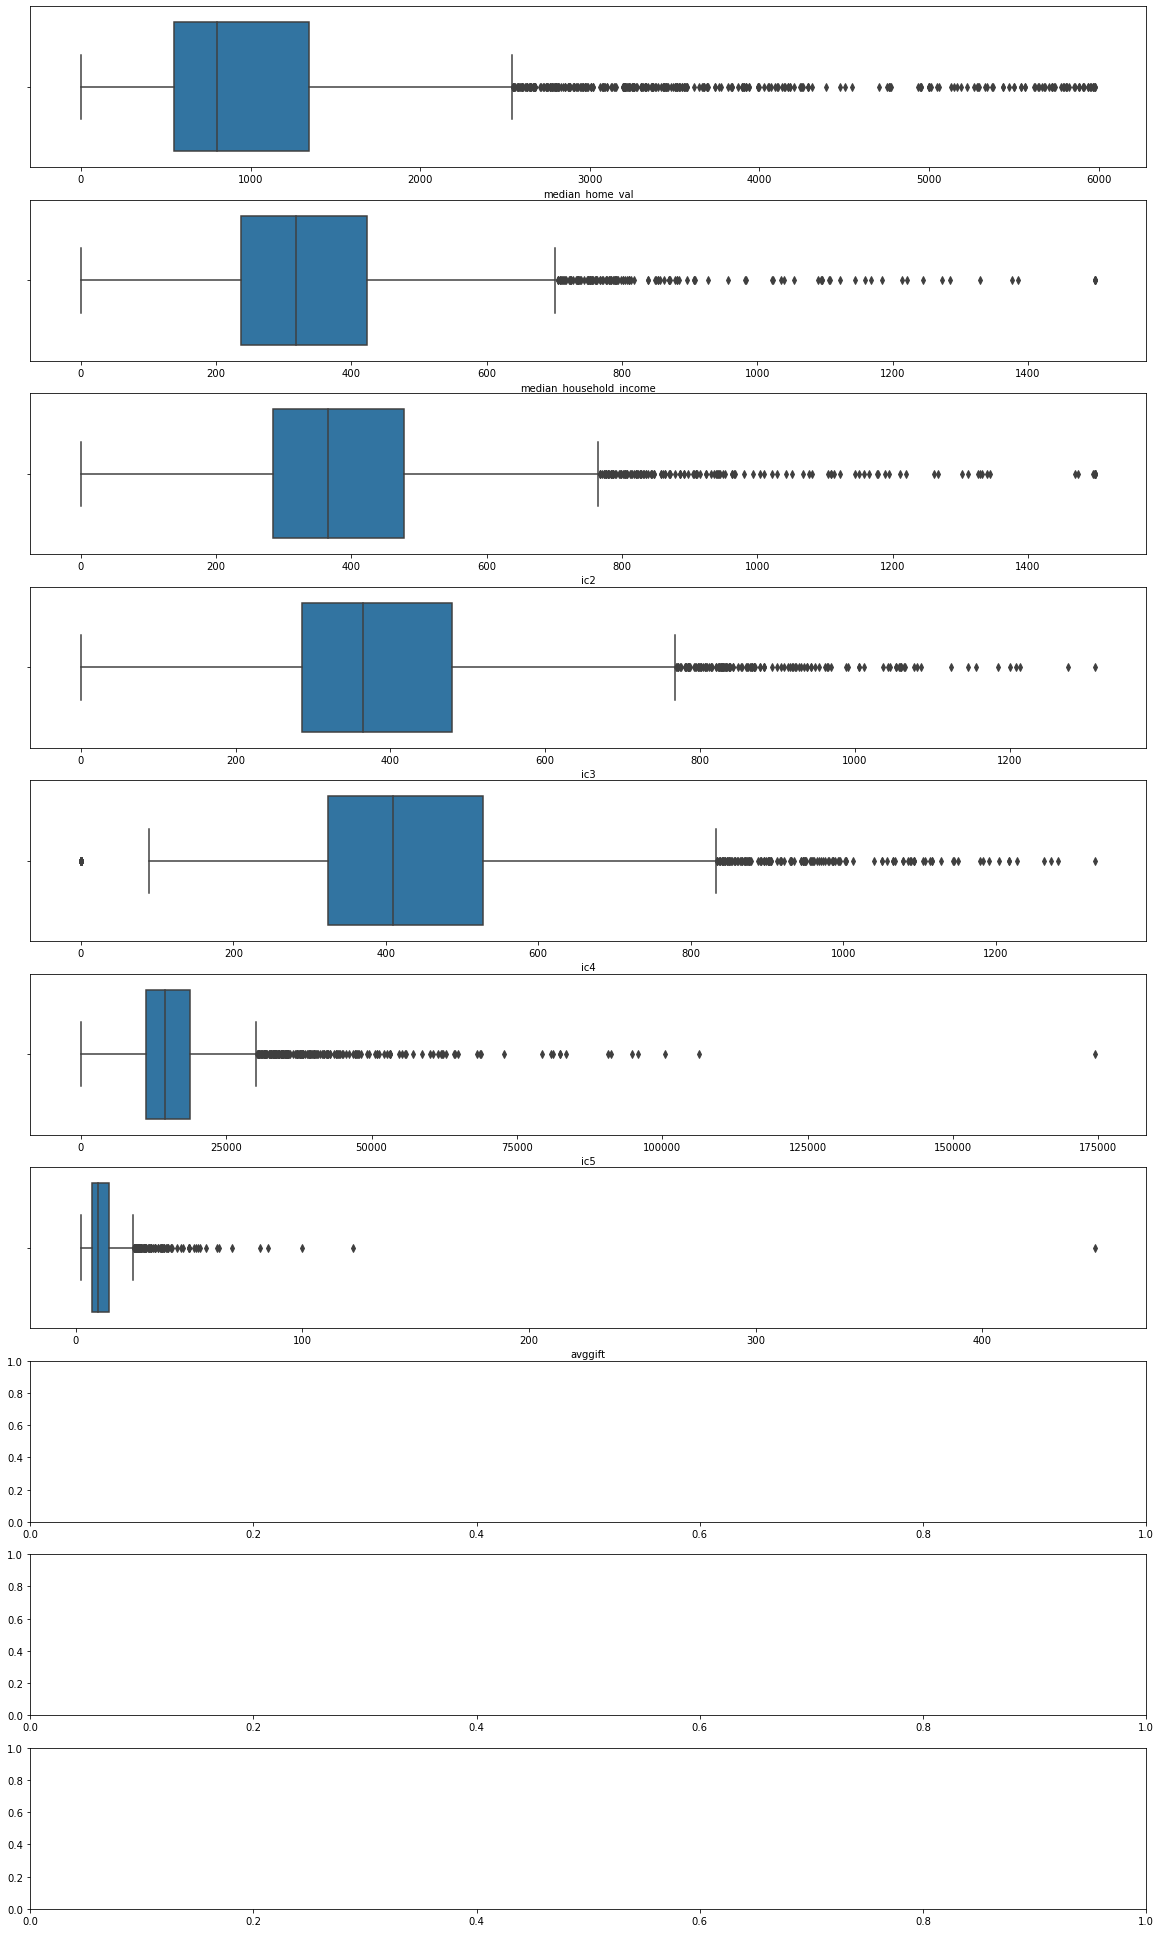

In [483]:
fig, ax = plt.subplots(10, 1, figsize=(20,35))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
plt.show()

In [484]:
for i in df_numericas.columns:
    print(i,df_numericas[i].min())

median_home_val 0.0
median_household_income 0.0
ic2 0.0
ic3 0.0
ic4 0.0
ic5 0.0
avggift 2.260869565


In [485]:
df_numericas["avggift"].max()

450.0

In [486]:
df_numericas["ic5"].max()

174523.0

In [487]:
df_numericas["ic4"].min()

0.0

In [488]:
df.shape

(3770, 11)

In [489]:
df.drop(df[df['avggift'] == 450.0].index, inplace=True)

In [490]:
df.drop(df[df['ic5'] == 174523.0].index, inplace=True)

In [491]:
df.drop(df[df['ic4'] == 0.0].index, inplace=True)

In [492]:
df.shape

(3739, 11)

In [493]:
def outliers(df, col):
    """
    Calculates the interquartile range of a column in a dataframe.
    
    Args:
        df (pandas Data Frame)
        col (string): name of the column
    Returns:
        q1: value of the first quartile
        q2: value of the second quartile
        outlier_iqr: interquartile range
    """
    q1 = np.nanpercentile(df[col], 25)
    q3 = np.nanpercentile(df[col], 75)
    iqr = q3 - q1
    outlier_step = 1.5 * iqr
    return q1, q3, outlier_step

def outliers_df(df, col):
    """
    Separates the outliers of a column in a dataframe.
    
    Args:
        df (pandas Data Frame)
        col (string): name of the column
    Methods:
        Uses the function outliers()
    Returns:
        outliers_data: dataframe with the outliers
    """
    outliers_data = df[(df[col] < outliers(df, col)[0] - outliers(df, col)[2]) | (df[col] > outliers(df, col)[1] + outliers(df, col)[2])]
    return outliers_data

def outliers_index(df, list_col):
    """
    Creates a list and a dictionary with the indexes of the outliers of a list of columns in a dataframe.
    
    Args:
        df (pandas Data Frame)
        list_col (list): list of strings with the names of the columns
    Methods:
        Uses the function outliers_df()
    Returns:
        dicc_index: dictionary with the name of the columns as keys and the indexes of the outliers as values
        outliers: list with the indexes of the outliers
    """
    dicc_index = {}
    for i in list_col:
        if outliers_df(df, i).shape[0] > 0:
            dicc_index[i] = list(outliers_df(df, i).index)
    outliers = list(set([i for sublist in list(dicc_index.values()) for i in sublist]))
    return dicc_index, outliers

In [494]:
outliers = outliers_index(df, df_numericas.columns)[1]

In [495]:
len(outliers)

500

In [496]:
df_no_outliers = df.drop(index=outliers)

In [497]:
df_no_outliers.set_index('id', inplace=True)
df_no_outliers.reset_index(inplace=True)

In [498]:
df_no_outliers.shape

(3239, 11)

In [499]:
df_no_outliers.isnull().sum()

id                           0
state                        0
gender                       0
median_home_val            178
median_household_income     97
ic2                          0
ic3                          0
ic4                          0
ic5                        328
avggift                    226
target_d                     0
dtype: int64

In [500]:
num_no_liers = df_no_outliers.select_dtypes(include=np.number)
num_no_liers = num_no_liers.drop(['id', 'target_d'], axis = 1)

In [501]:
num_no_liers.shape

(3239, 7)

In [502]:
imputerKNN = KNNImputer(n_neighbors=5)
imputerKNN.fit(num_no_liers)

KNNImputer()

In [503]:
num_no_liers_knn = imputerKNN.transform(num_no_liers)

In [504]:
df_no_outliers_knn = pd.DataFrame(num_no_liers_knn, columns=num_no_liers.columns)

In [505]:
df_no_outliers_knn.shape

(3239, 7)

In [506]:
df_no_outliers_knn.isnull().sum()

median_home_val            0
median_household_income    0
ic2                        0
ic3                        0
ic4                        0
ic5                        0
avggift                    0
dtype: int64

In [507]:
columns_no_outliers_knn = df_no_outliers_knn.columns

In [508]:
columns_no_outliers_knn

Index(['median_home_val', 'median_household_income', 'ic2', 'ic3', 'ic4',
       'ic5', 'avggift'],
      dtype='object')

In [509]:
df_no_outliers.drop(columns_no_outliers_knn, axis=1, inplace=True)

In [510]:
df_no_outliers.shape

(3239, 4)

In [511]:
df_no_outliers.isnull().sum()

id          0
state       0
gender      0
target_d    0
dtype: int64

In [512]:
df_no_outliers.head(6)

,id,state,gender,target_d
0,44060,FL,M,100.0
1,96093,IL,M,7.0
2,43333,FL,F,5.0
3,190108,FL,F,5.0
4,154301,CA,F,10.0
5,73699,MI,F,15.0


In [513]:
df_no_outliers[columns_no_outliers_knn] = df_no_outliers_knn[columns_no_outliers_knn]

In [514]:
df_no_outliers["rooms_per_neigh"] = df_no_outliers["ic4"]/df_no_outliers["ic3"]
df_no_outliers["baths_per_neigh"] = df_no_outliers["ic5"]/df_no_outliers["ic3"]
df_no_outliers["population_per_household"] = df_no_outliers["ic2"]/df_no_outliers["ic3"]

In [515]:
df_no_outliers.shape

(3239, 14)

In [516]:
df_no_outliers.isnull().sum()

id                          0
state                       0
gender                      0
target_d                    0
median_home_val             0
median_household_income     0
ic2                         0
ic3                         0
ic4                         0
ic5                         0
avggift                     0
rooms_per_neigh             0
baths_per_neigh             0
population_per_household    0
dtype: int64

Ahora los outliers

In [517]:
df_outliers = df.loc[outliers]

In [518]:
df_outliers.set_index('id', inplace=True)
df_outliers.reset_index(inplace=True)

In [519]:
df_outliers.head(5)

,id,state,gender,median_home_val,median_household_income,ic2,ic3,ic4,ic5,avggift,target_d
0,21885,NC,M,1158.437751,401.0,407.0,399.0,413.0,14014.0,27.277778,38.0
1,107569,NE,M,443.000000,231.0,288.0,281.0,323.0,11042.0,36.111111,50.0
2,141720,NV,F,1569.000000,673.0,672.0,785.0,781.0,25775.0,13.000000,5.0
3,186272,CA,F,3515.000000,521.0,565.0,549.0,588.0,20068.0,8.640000,10.0
4,1068,CA,F,3528.000000,814.0,808.0,867.0,867.0,25564.0,6.162791,5.0


In [520]:
df_outliers.shape

(500, 11)

In [521]:
df_outliers.isnull().sum()

id                          0
state                       0
gender                      0
median_home_val            15
median_household_income    18
ic2                         0
ic3                         0
ic4                         0
ic5                        42
avggift                    31
target_d                    0
dtype: int64

In [522]:
num_liers = df_outliers.select_dtypes(include=np.number)
num_liers = num_liers.drop(['id', 'target_d'], axis = 1)

In [523]:
num_liers.shape

(500, 7)

In [524]:
imputerKNN = KNNImputer(n_neighbors=5)
imputerKNN.fit(num_liers)

KNNImputer()

In [525]:
num_liers_knn = imputerKNN.transform(num_liers)
df_outliers_knn = pd.DataFrame(num_liers_knn, columns=num_no_liers.columns)

In [526]:
df_outliers_knn.shape

(500, 7)

In [527]:
df_outliers_knn.isnull().sum()

median_home_val            0
median_household_income    0
ic2                        0
ic3                        0
ic4                        0
ic5                        0
avggift                    0
dtype: int64

In [528]:
columns_outliers_knn = df_outliers_knn.columns
columns_outliers_knn

Index(['median_home_val', 'median_household_income', 'ic2', 'ic3', 'ic4',
       'ic5', 'avggift'],
      dtype='object')

In [529]:
df_outliers.drop(columns_outliers_knn, axis=1, inplace=True)

In [530]:
df_outliers.isnull().sum()

id          0
state       0
gender      0
target_d    0
dtype: int64

In [531]:
df_outliers[columns_outliers_knn] = df_outliers_knn[columns_outliers_knn]

In [532]:
df_outliers["rooms_per_neigh"] = df_outliers["ic4"]/df_outliers["ic3"]
df_outliers["baths_per_neigh"] = df_outliers["ic5"]/df_outliers["ic3"]
df_outliers["population_per_household"] = df_outliers["ic2"]/df_outliers["ic3"]

In [533]:
df_outliers.shape

(500, 14)

In [534]:
df_outliers.isnull().sum()

id                          0
state                       0
gender                      0
target_d                    0
median_home_val             0
median_household_income     0
ic2                         0
ic3                         0
ic4                         0
ic5                         0
avggift                     0
rooms_per_neigh             0
baths_per_neigh             0
population_per_household    0
dtype: int64

In [535]:
df_no_outliers.to_csv(r"C:\Users\mituc\Ironhack\Curso\IronLabs\California-cleanin\california_no_outliers.csv")
df_outliers.to_csv(r"C:\Users\mituc\Ironhack\Curso\IronLabs\California-cleanin\california_outliers.csv")